This lab plays with numerical methods similar to what we learned in class. We study how to solve initial-value problems in the form of $y'=f(t,y)$, $y(t_0)=y_0$.

The idea is, given the initial condition $(t_0,y_0)$, we compute a set of discrete points $(t_0,y_0)$, $(t_1,y_1)$, $(t_2,y_2)$,...,$(t_N,y_N)$. Here $t_j = t_0+j\Delta t$, and $y_j$ is an approximation to the value of the solution at $t_j$, i.e. $y_j\approx y(t_j)$. Once the set of points are obtained, we simply plot the approximate solution by connecting the dots, or fit some sort of curve thru the points.  

We will be investigating how step size $\Delta t$ impact the accuracy of approximate solutions, and how different methods impact accuracy of approximate solutions. 

In [1]:
## import packages
import numpy as np
import scipy as sp
import matplotlib 
import matplotlib.pyplot as plt 

1. Euler's method. We use the difference quotient directly to approximate the derivative $$y'(t_{j+1})\approx \frac{y_{j+1}-y_j}{\Delta t}.$$
Then the differential equation becomes a difference equation
$$\frac{y_{j+1}-y_j}{\Delta t}=f(t_j,y_j),$$
and given the approximate value from step $j$, we can find value in step $j+1$: 
$$y_{j+1}=y_j+\Delta tf(t_j,y_j)$$

Example: Approximate the solution to $y'=t-y,\ y(0)=1$, on the interval [0,2].


In [2]:
## We take the number of steps N to be 4, then dt = 0.5
N = 40
dt = (2-0)/N
print(dt)

0.05


In [3]:
## define right hand side function
def rhs(t,y):
    return t-y

## give a vector valued t, and print the output
t = np.linspace(0,2,num = N, endpoint = False)

## make a zero array to store computations

y = np.zeros(np.size(t))

## initial condition y0 = 1/e (y(-1)=e^(-1))

y[0] = 1

## iterative step for computing the unknown value y
for i in range(np.size(t)-1):
    y[i+1] = y[i] + dt*rhs(t[i],y[i]) 

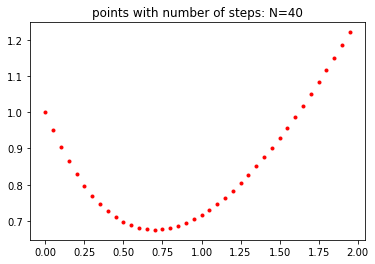

In [4]:
## visualize the numerical solutions: discrete data points
plt.plot(t, y, '.r')
plt.title('points with number of steps: N=%i' %N)
plt.show()

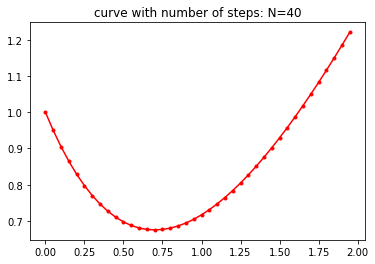

In [5]:
## visualize the numerical solutions: connect the dots
plt.plot(t, y, '.r-')
plt.title('curve with number of steps: N=%i' %N)
plt.show()

In [6]:
## change N to 40, 400, and 4000. Run above cells, and plot the images for each. Your submitted
## .ipynb should have the result for N = 4000. 

This equation is linear, and  you can solve to find the solution to be $y(t)=t-1+2e^{-t}$. In the following, we plot the true solution.  

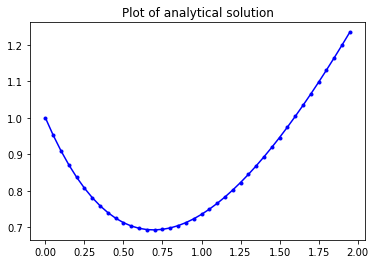

In [7]:
## plot analytical solution of DE
y_true = t-1+2*np.e**(-t)
plt.plot(t, y_true, '.b-')
plt.title('Plot of analytical solution')
plt.show()

The claim is, the smaller $\Delta t$ is, the closer the approximate solution is to the true solution. So we compute the error term at $t=2$. 

In [ ]:
## Run the cell with N = 4, 40, 400, 4000, save your result in comments. 

temp = np.abs(y[-1] - y_true[-1])
print(temp)

# N = 4
# error1 = np.abs(y[-1] - y_true[-1]) = paste your result of temp here

# N = 40
# error2 = np.abs(y[-1] - y_true[-1]) = paste your result of temp here

# N = 400
# error3 = np.abs(y[-1] - y_true[-1]) = paste your result of temp here

# N = 4000
# error4 = np.abs(y[-1] - y_true[-1]) = paste your result of temp here


Another popular method for solving ODEs is called Runge-Kutta method. It is a forth order method, meaning the error between exact and numerical solutions is of order $O(\Delta t)^4$. In the following, we will go thru the algorithm for the same equation above. 

In [8]:
## make a zero array to store computations

yRK = np.zeros(np.size(t))

## initial condition y0 = 1/e (y(-1)=e^(-1))

yRK[0] = 1

## iterative steps for RK method
for i in range(np.size(t)-1):
    m1 = rhs(t[i],yRK[i])
    m2 = rhs(t[i] + dt/2,yRK[i] + m1*dt/2)
    m3 = rhs(t[i] + dt/2,yRK[i] + m2*dt/2)
    m4 = rhs(t[i] + dt,yRK[i] + m3*dt)
    yRK[i+1] = yRK[i] + dt/6*(m1 + 2*m2 + 2*m3 + m4) 

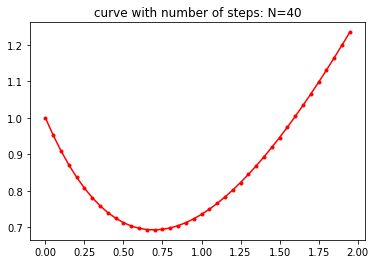

In [9]:
plt.plot(t, yRK, '.r-')
plt.title('curve with number of steps: N=%i' %N)
plt.show()

In [ ]:
## write your own code to compare: when using the same N, which method is better, Euler or Runge-Kutta?

In [ ]:
## Add your own code here. Make sure to do analysis, and document in comments.